This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

plt.style.use('fivethirtyeight')

In [2]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

Here we examine the number of observations for ratings, movies and users and their data.

In [4]:
!cat 'data/movielens/README'

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

In [6]:
print("Number of users: {}\nColumns: {}\n".format(users.shape[0], users.columns.values))

print("Number of movies: {}\nColumns: {}\n".format(movies.shape[0], movies.columns.values))

print("Number of ratings: {}\nColumns: {}\n".format(ratings.shape[0], ratings.columns.values))

Number of users: 6040
Columns: ['user_id' 'gender' 'age' 'occupation' 'zip']

Number of movies: 3883
Columns: ['movie_id' 'title' 'genres']

Number of ratings: 1000209
Columns: ['user_id' 'movie_id' 'rating' 'timestamp']



The movie and rating tables are related by the primary key movie_id. The primary key user_id relates the ratings dataframe to the user dataframe.

[10 16 15  7 20  9  1 12 17  0  3 14  4 11  8 19  2 18  5 13  6]
Largest bin value: 759


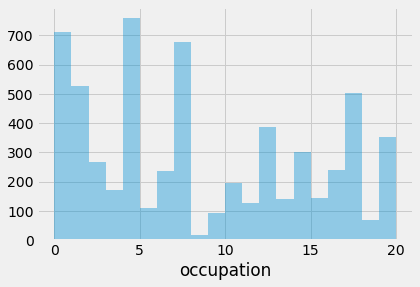

In [7]:
print(users['occupation'].unique())
_ = sns.distplot(users['occupation'], kde=False, bins=20)

print("Largest bin value: {}".format(len(users[users['occupation'] == 4])))

The following code visualizes these thoughts:

- What is the occupation that maps to most of the users? 
   
- What percentage of users are 50 years old or older?
   
- Which movie received the highest number of ratings?
   
- What is the average rating for all movies/users?
   

Percentage of users aged 50 or older: 14.50%


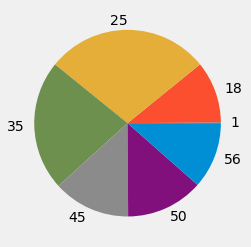

In [8]:
print("Percentage of users aged 50 or older: {:.2f}%".format(len(users['age'][users['age'] >= 50]) / len(users)*100))
sums = users['age'].groupby(users.age).sum()
plt.pie(sums, labels=sums.index)
plt.show()

Most rated movie: Brief Encounter (1946)


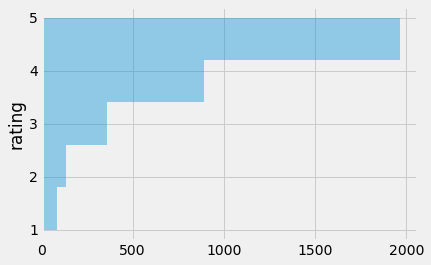

In [9]:
movie_rating_count = ratings['movie_id'].value_counts()
most_rated_idx = movie_rating_count.idxmax()
print("Most rated movie: {}".format(movies['title'][most_rated_idx]))

_ = sns.distplot(ratings['rating'][ratings['movie_id'] == most_rated_idx], kde=False, bins=5, vertical=True)

In [10]:
print(ratings.groupby("movie_id")['rating'].mean())
print(ratings.groupby("user_id")['rating'].mean())

movie_id
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: rating, Length: 3706, dtype: float64
user_id
1       4.188679
2       3.713178
3       3.901961
4       4.190476
5       3.146465
          ...   
6036    3.302928
6037    3.717822
6038    3.800000
6039    3.878049
6040    3.577713
Name: rating, Length: 6040, dtype: float64


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [13]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [14]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


The following code demonstrates favorite movies among male viewers with over 250 ratings or more and the top 10 favorite movies amount young viewers with more than 300 ratings.

In [15]:
rating_counts = data.groupby('title').count()

active_index = rating_counts['rating'] >= 250

male_data = data[data['gender'] == 'M']

active_movie_ratings = male_data.groupby("title").mean()[active_index]

sorted_active_movie_ratings = active_movie_ratings.sort_values(by="rating", ascending=False)['rating']

sorted_active_movie_ratings[:10]

<ipython-input-15-8713555d2e5a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_movie_ratings = male_data.groupby("title").mean()[active_index]


title
Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Star Wars: Episode IV - A New Hope (1977)                              4.495307
Schindler's List (1993)                                                4.491415
Wrong Trousers, The (1993)                                             4.478261
Close Shave, A (1995)                                                  4.473795
Rear Window (1954)                                                     4.472991
Name: rating, dtype: float64

In [16]:
rating_counts = data.groupby('title').count()

active_index = rating_counts['rating'] >= 300

teen_data = data[data['age'] <= 17]

active_movie_ratings = teen_data.groupby("title").mean()[active_index]

sorted_active_movie_ratings = active_movie_ratings.sort_values(by="rating", ascending=False)['rating']

sorted_active_movie_ratings[:10]

<ipython-input-16-ec31a92b08a3>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_movie_ratings = teen_data.groupby("title").mean()[active_index]


title
Metropolis (1926)              4.888889
GoodFellas (1990)              4.840000
Third Man, The (1949)          4.818182
Double Indemnity (1944)        4.777778
Piano, The (1993)              4.750000
Fried Green Tomatoes (1991)    4.750000
Raging Bull (1980)             4.714286
Roman Holiday (1953)           4.687500
Citizen Kane (1941)            4.680000
Notorious (1946)               4.666667
Name: rating, dtype: float64

The following code finds
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

In [17]:
rating_counts = data.groupby('title').count()

active_index = rating_counts['rating'] >= 250

mean_ratings = data.pivot_table("rating", index="title", columns="gender")[active_index]

m_diff = round(mean_ratings['M'] - mean_ratings['F'], 2).sort_values(ascending=False)
f_diff = round(mean_ratings['F'] - mean_ratings['M'], 2).sort_values(ascending=False)

print("Male differences:\n{}\n\nFemale differences:\n{}".format(m_diff[:10], f_diff[:10]))

Male differences:
title
Good, The Bad and The Ugly, The (1966)    0.73
Kentucky Fried Movie, The (1977)          0.68
Dumb & Dumber (1994)                      0.64
Longest Day, The (1962)                   0.62
Cable Guy, The (1996)                     0.61
Evil Dead II (Dead By Dawn) (1987)        0.61
Hidden, The (1987)                        0.61
Rocky III (1982)                          0.58
Caddyshack (1980)                         0.57
Animal House (1978)                       0.54
dtype: float64

Female differences:
title
Dirty Dancing (1987)                     0.83
Jumpin' Jack Flash (1986)                0.68
Grease (1978)                            0.61
Little Women (1994)                      0.55
Steel Magnolias (1989)                   0.54
Anastasia (1997)                         0.52
Rocky Horror Picture Show, The (1975)    0.51
Color Purple, The (1985)                 0.50
Age of Innocence, The (1993)             0.49
French Kiss (1995)                       0.48
dtyp

The following code finds films which elicited the most disagreement among viewers.

In [14]:
rating_counts = data.groupby('title').count()

active_index = rating_counts['rating'] >= 250

var_ratings = data.groupby("title")['rating'].std().sort_values(ascending=False)

var_ratings[:10]

title
Foreign Student (1994)                                             2.828427
Criminal Lovers (Les Amants Criminels) (1999)                      2.309401
Identification of a Woman (Identificazione di una donna) (1982)    2.121320
Sunset Park (1996)                                                 2.121320
Eaten Alive (1976)                                                 2.121320
Neon Bible, The (1995)                                             2.121320
Talk of Angels (1998)                                              2.121320
Tokyo Fist (1995)                                                  2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)           2.121320
Better Living (1998)                                               2.121320
Name: rating, dtype: float64

What is the most popular movie genre? 

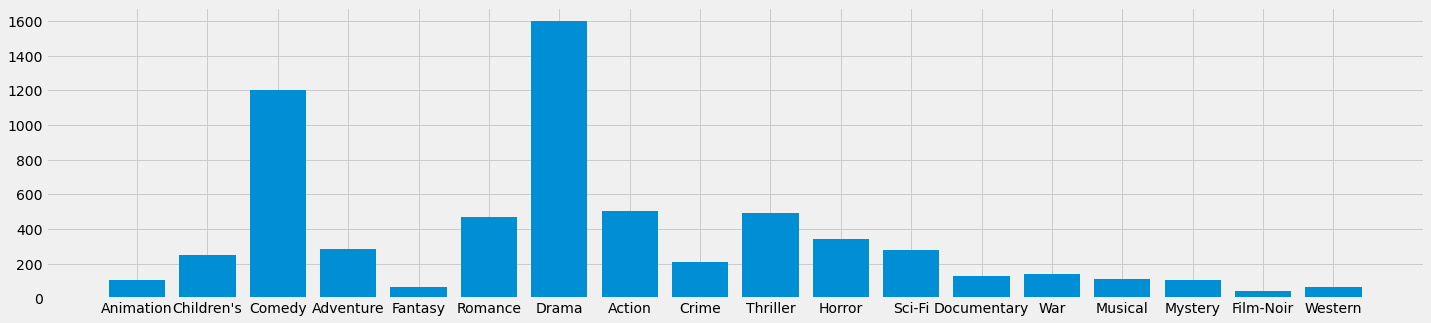

In [18]:
from collections import defaultdict

hist = defaultdict(lambda: 0)

for genre_str in movies['genres']:
    for genre in genre_str.split('|'):
        hist[genre] += 1

plt.figure(figsize=(22,5))
plt.bar(hist.keys(), hist.values())
plt.style.use('fivethirtyeight')

## Titanic Dataset

In [23]:
titanic = sns.load_dataset('titanic')

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The following code addresses the following: 
- How many female passengers did not survive (regardless of their class)?
- How many first class female passengers did not survive?
- How many male passengers did not survive (regardless of their class)?
- How many third class male passengers did not survive?

In [25]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


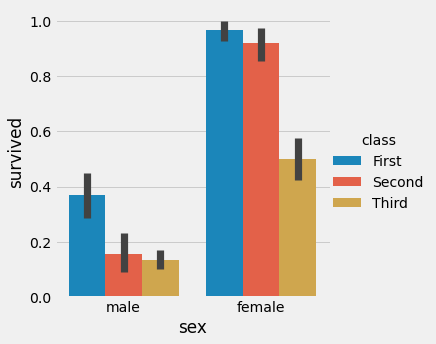

In [26]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

In [27]:
f_deathrate = 1 - titanic.pivot_table("survived", columns="sex").values[0][0]
print("Female passengers who did not survive: {:.2f}%".format(f_deathrate * 100))

f_1st_deathrate = 1- titanic[titanic['class'] == 'First'].pivot_table("survived", columns="sex").values[0][0]
print("Female first class passengers who did not survive: {:.2f}%".format(f_1st_deathrate * 100))

m_deathrate = 1 - titanic.pivot_table("survived", columns="sex").values[0][1]
print("Male passengers who did not survive: {:.2f}%".format(m_deathrate * 100))

m_3rd_deathrate = 1 - titanic[titanic['class'] == 'Third'].pivot_table("survived", columns="sex").values[0][1]
print("Male third class passengers who did not survive: {:.2f}%".format(m_3rd_deathrate * 100))

Female passengers who did not survive: 25.80%
Female first class passengers who did not survive: 3.19%
Male passengers who did not survive: 81.11%
Male third class passengers who did not survive: 86.46%


How many passengers (absolute number) were there per deck/class? 

How many passengers (absolute number) in Deck A survived?

How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

In [28]:
deck_class_dist = titanic.pivot_table('who', index="deck", columns="class", aggfunc="count", fill_value=0)
print("Distribution by deck and class:\n{}\n".format(deck_class_dist))

print("Deck A survivors: {}\n".format(titanic[titanic['deck'] == 'A']['survived'].sum()))

print("Deck E survivor breakdown:\n{}".format(titanic[titanic['deck'] == 'E'].groupby("class").sum()['survived']))

Distribution by deck and class:
class  First  Second  Third
deck                       
A         15       0      0
B         47       0      0
C         59       0      0
D         29       4      0
E         25       4      3
F          0       8      5
G          0       0      4

Deck A survivors: 7

Deck E survivor breakdown:
class
First     18
Second     3
Third      3
Name: survived, dtype: int64


How many women traveling alone did not survive?

How many men 35 years old or younger did not survive?

What was the average fare per class?

In [22]:
f_alone_deathrate = 1 - titanic[titanic['alone'] == True].groupby(by="sex").mean()['survived']['female']
print("Women traveling alone: {:.2f}%\n".format(f_alone_deathrate*100))

men = titanic[(titanic['age'] <= 35) & (titanic['sex'] == 'male')].groupby('survived').count()['who']
print("Men 35 years or younger who died: {:.2f}%\n".format((men[0] / men.sum() * 100)))

print("Average fare by class:\n{}".format(titanic.groupby("class")["fare"].mean()))

Women traveling alone: 21.43%

Men 35 years or younger who died: 78.32%

Average fare by class:
class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


## Baby Births

In [34]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

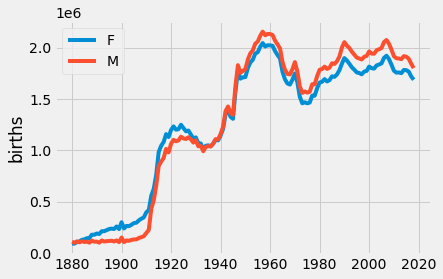

In [35]:
labels = ["sex", "year"]
sexes = names['sex'].unique()
x = names['year'].unique()

for sex in sexes:
    y = names.loc[names['sex'] == sex].groupby("year").sum()['births']
    sns.lineplot(x, y, label=sex)

Analyzing Naming Trends

The following code analyzes the top 1000 baby names popularity over time

In [36]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [37]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [38]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [39]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [40]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [41]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [42]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [43]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


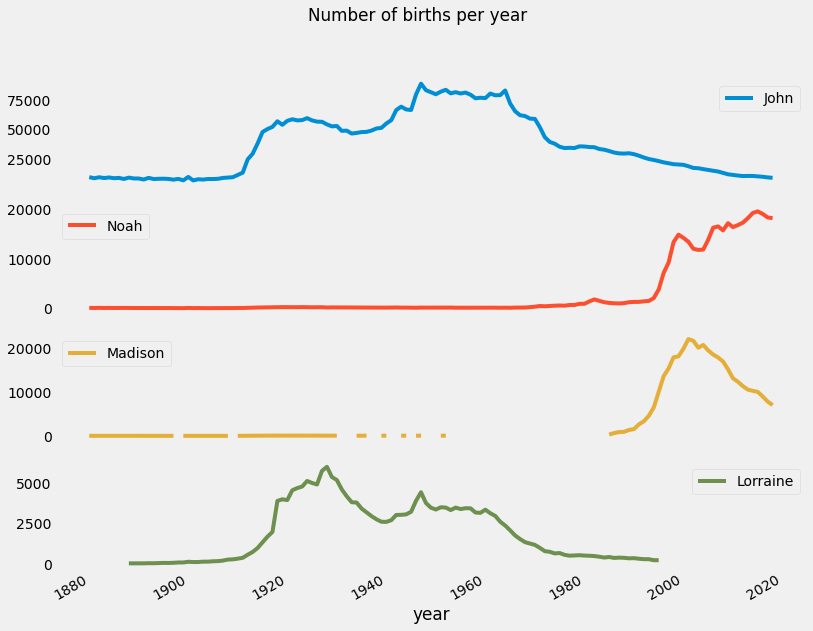

In [44]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")
plt.show()

The following python code tests the hypothesis there has been an increase in naming diversity over time. 

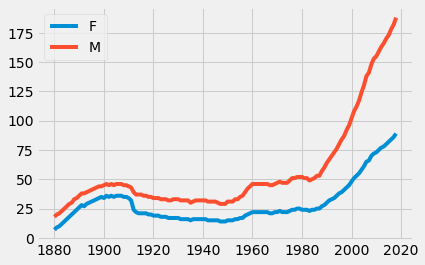

In [45]:
from collections import defaultdict

total_year = names.groupby(["sex", "year"]).sum()['births']
names_by_year = defaultdict(lambda: list())

max_names = 1000
sexes = names['sex'].unique()

for sex in sexes:
    
    iterable = total_year[sex,].items()
    
    for year, total in iterable:
        temp = 0

        year_names = names[names['year'] == year].groupby('name')
        sorted_year_names = year_names.sum().sort_values('births', ascending=False)['births']

        for name, births in sorted_year_names[0:max_names].items():
            if temp <= total // 2:
                temp += births
                names_by_year[year].append(name)

            else:
                names_by_year[year].append(np.nan)

    final = pd.DataFrame.from_dict(names_by_year)
    sns.lineplot(final.columns.values, final.count(), label=sex)

Boy names that became girl names (and vice versa)

In [46]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [47]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [48]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<AxesSubplot:xlabel='year'>

<Figure size 432x288 with 0 Axes>

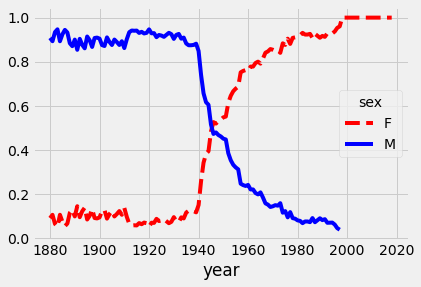

In [49]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

Hypothesis 2: The number of gender name outliers (a popular name for the opposite gender) increased over time

In [50]:
# top names for ea gender
max_names = 5000
sexes = names['sex'].unique()
top_names = pd.DataFrame(index=range(0,max_names))

for sex in sexes:
    sorted_ = names[names['sex'] == sex].groupby('name').sum().sort_values(by='births', ascending=False)['births']
    top_names[sex] = sorted_[0:max_names].index

print(top_names.shape) 
top_names.head()

(5000, 2)


,F,M
0,Mary,James
1,Elizabeth,John
2,Patricia,Robert
3,Jennifer,Michael
4,Linda,William


In [51]:
# filter main table using top names 
filtered = names[names['name'].isin(top_names.unstack())]

# group, aggregate, slice and cast to tuples to create an iterable
iterable = filtered.groupby(['year', 'name', 'sex']).sum()['births']
iterable.head()

year  name    sex
1880  Aaron   M      102
      Abbie   F       71
      Abbott  M        5
      Abby    F        6
      Abe     M       50
Name: births, dtype: int64

In [52]:
# by using the observation that the above table will only contain
# duplicate entries by year if theres is a gender mismatch we may do the following
from collections import defaultdict

name_dict = defaultdict(lambda: False)
outliers = defaultdict(lambda: 0)
current = 1880

for tup, births in iterable.items():
        year, name, sex = tup

        # test for new year
        if year != current:
            name_dict.clear()
            
        current = year
        
        # if this isn't the first occurrence then it is a gender mismatch
        if name_dict[name]:
            outliers[year] += 1

        # regardless of above test, set name key to true
        name_dict[name] = True

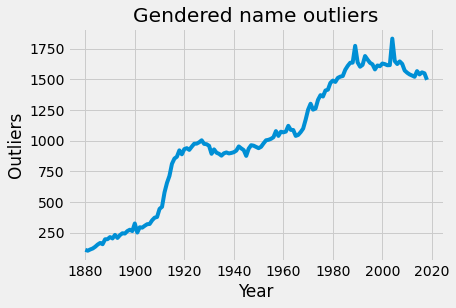

In [53]:
x = list(outliers.keys())
y = list(outliers.values())

ax = sns.lineplot(x, y)
ax.set(xlabel='Year', ylabel='Outliers', title='Gendered name outliers')
plt.show()